# <center>Greenberg-Castagna Transform Tutorial in Python</center>
## <center>Jupyter Notebook by Faisal Kawash</center>

### **Importing Packages**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Import the "Seven Shales" data as pd.DataFrame from github**

In [3]:
url = "https://github.com/TheDivider10/Greenberg-Castagna-Python/blob/main/seven_shales.xls?raw=true"
data = pd.read_excel(url)
data

,Formation,RHOB,Vp,Vs,XTOC,Xpyrite,Xcalcite,Xdolomite,Xclay,Xquartz,PhiT,SwT,RhoG,TOC (wt%)
0,Spraberry,2.5639,3.7856,2.1940,0.044481,0.017510,0.120609,0.000000,0.376400,0.441001,0.083707,0.6307,2.643787,2.295201
1,Spraberry,2.5428,3.7231,2.1692,0.051676,0.010595,0.186595,0.000000,0.381081,0.370054,0.078318,0.6446,2.638266,2.656419
2,Spraberry,2.5258,3.7141,2.1519,0.057338,0.000856,0.287976,0.000000,0.387570,0.266260,0.068646,0.6858,2.637378,2.917890
3,Spraberry,2.5132,3.7026,2.1214,0.061308,0.000000,0.306538,0.000000,0.401608,0.230547,0.070532,0.6620,2.634771,3.129300
4,Spraberry,2.5099,3.7015,2.1172,0.061985,0.004551,0.249567,0.000000,0.425011,0.258886,0.080785,0.6059,2.633370,3.200880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,Bakken,2.2815,3.0050,1.7630,0.237649,0.025412,0.000000,0.214963,0.220962,0.301014,0.090467,0.1684,2.456278,13.296869
2029,Bakken,2.2814,2.9576,1.7378,0.244271,0.028022,0.000000,0.199088,0.211035,0.317584,0.086426,0.1524,2.439870,13.698430
2030,Bakken,2.2925,2.8986,1.7105,0.239909,0.029759,0.000000,0.173250,0.211882,0.345201,0.083052,0.1590,2.435374,13.429088
2031,Bakken,2.2975,2.8387,1.6848,0.235734,0.032052,0.000000,0.148565,0.235409,0.348240,0.084465,0.1663,2.433981,13.223286


### **Check the Data for any Far Outliers**

In [4]:
data.describe()

,RHOB,Vp,Vs,XTOC,Xpyrite,Xcalcite,Xdolomite,Xclay,Xquartz,PhiT,SwT,RhoG,TOC (wt%)
count,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000,2033.000000
mean,2.510373,3.800538,2.263645,0.091064,0.023777,0.191696,0.010405,0.245587,0.437471,0.077238,0.439027,2.568201,4.875060
std,0.069188,0.332164,0.191312,0.049936,0.011375,0.254512,0.037622,0.091504,0.188485,0.020061,0.136041,0.077151,2.841658
min,2.214700,2.711700,1.668500,0.000100,0.000000,0.000000,0.000000,0.000000,0.002455,0.011434,0.060300,2.260224,0.004795
25%,2.480600,3.594200,2.122800,0.055107,0.016395,0.000000,0.000000,0.176273,0.286508,0.063461,0.329700,2.507130,2.865509
50%,2.524600,3.749100,2.238800,0.071537,0.024939,0.044650,0.000000,0.239100,0.511346,0.077458,0.444100,2.594072,3.780798
75%,2.552200,4.006100,2.397800,0.124353,0.032218,0.408125,0.000000,0.307477,0.578309,0.091617,0.542200,2.626748,6.611015
max,2.698700,5.286600,3.093900,0.330300,0.056351,0.812137,0.287202,0.523555,0.821329,0.159928,0.933700,2.743933,19.468163


We see that the TOC (wt%) has a max of ~19.5%, while the mean is ~4.8% and the Q3 being ~6.6%. This insinuates that a small number of samples have TOC (wt%) greater than 9% or 10% arbitraily. Therefore, it should of interest to see if these samples with high TOC (wt%) come from a single layer, which may pose a problem during Vs predictions resulting in more erroneous results.

### **Identify where TOC (wt%) is greater than 9%**

In [5]:
toc_percent = 9  # This value is adjustable

toc_over = data.where(data["TOC (wt%)"] >= toc_percent).dropna() # Find rows where TOC (wt%) >= 9%
temp = data[data["Formation"].isin(toc_over["Formation"])] # Find rows that have ["Formations"] in toc_check

print(f"Percent (%) of Formation with over {toc_percent}% TOC")
round(toc_over["Formation"].value_counts() / temp["Formation"].value_counts() * 100) # Take value counts of both ["Formation"] series to get a percentage

Percent (%) of Formation with over 9% TOC


Avalon     23.0
Bakken    100.0
Cline       2.0
Name: Formation, dtype: float64

Bakken has the most significant TOC (wt%), with the entire formation being over 9%, hence it may be problematic when conducting Vs predictions. The Avalon formation may also be another problematic shale with approximately 1/4 of the formation being over 9%. However, to ascertain whether this is true or not Vs predictions must first be ran.

### **Define Voigt (arithmetic avg.) and Reuss (harmonic avg.) Functions**

$X_i$: Volume Fraction

$\theta_i$: Measurement

Voigt Avg:  $\sum_{n=1}^{N}{X_i}{\theta_i}$

Reuss Avg:  $(\sum_{n=1}^{N}{X_i}{\theta_i^{-1}})^{-1}$

In [6]:
def voigt(volume_frac, param):
    return np.sum(np.array(volume_frac) * np.array(param))

def reuss(volume_frac, param):
    return 1/np.sum(np.array(volume_frac) * (1/np.array(param)))

### **Define Vs Estimation based on Greenberg-Castagna 1992 Paper**

${\beta_C}$: Shear-Wave Velocity

${\alpha_C}$: Compressional-Wave Velocity

${X_i}$: Volume Fraction

${a_{ij}}$: Polynomial Coefficients of Pure Porous Lithology

${\sum_{j=0}^{N_i}{a_{ij}}{\alpha_C^j}}$ = ${a_{i2}}{\alpha_C^2} + {a_{i1}}{\alpha_C} + {a_{i0}}$

### ${\beta_C} = 0.5 * ( ({\sum_{i=0}^{L}{X_i}}{\sum_{j=0}^{N_i}{a_{ij}}{\alpha_C^j}}) +  ({\sum_{i=0}^{L}{X_i}}({\sum_{j=0}^{N_i}{a_{ij}}{\alpha_C^j}})^{-1})^{-1})$

*Note: Polynomial Coefficients will be stored in a $List[List[floats]]$ in order of Volume Fractions*

In [7]:
def estimate_Vs(volume_frac, Vp, poly_coefficients):
    Z = []
    for a in poly_coefficients:
        lith_Vs = a[0]*Vp**2 + a[1]*Vp + a[2]
        Z.append(lith_Vs)
    v = voigt(volume_frac, Z)
    r = reuss(volume_frac, Z)
    return 0.5 * (v + r)

### Define the Greenberg-Castagna 1992 Algorithm

*Note: A subscript of "1" denotes 100% Water Saturation, while "S" denotes in-situ Water Saturation.*

*The following variables need to be solved for before proceeding with the Greenberg-Castagna Algorithm: density ($\rho_C$), fluid bulk modulus ($K_{fC}$), grain bulk modulus ($K_{gC}$)* 

<br>

1. Guess the Compressional Wave Velocity at 100% Water Sat. ($\alpha_{1C}$) using a Slack Variable ($\delta$)
    - $\alpha_{1C} = (1 + \delta)\alpha_{SC}$
    
2. Calculate Shear Modulus ($\mu_C$)
    - $\mu_C = 0.25\rho_{1C}\beta_{1C}$

3. Calculate Wetted Bulk Modulus ($K_{C}$) at in-situ Saturation
    - $K_{SC} = \rho_{SC}\alpha_{SC}^2 - (4/3){\mu_C}$

4. Calculate Dry Bulk Modulus ($K_D$)
    - $porosity = \phi$
    - $\lambda  = \phi{K_{gC}^{-1}} + (1 - \phi)K_{SfC}^{-1}$
    - $K_D = K_{gC}({\lambda}K_{SC}-1)/({\lambda}K_{gC}-2 + (K_{SC}/K_{gC}))$

5. Calculate second estimate of $\alpha_{1C}$ ($\alpha_{1C}^{'}$)
    - $\Gamma = 1 - \phi - K_D/K_{gC}$
    - $\alpha_{1C}^{'} = \sqrt{K_D + (4/3)\mu_C + (\Gamma + \phi)^2/(\Gamma{K_{gC}^{-1}} + \phi{K_w^{-1}})/\rho_{1C}}$

6. Calculate Error, if error is not sufficiently small adjust $\delta$ and start at Step 1, else Calculate for $\beta_C$
    - $percent{\hspace{1mm}}error = \frac{\alpha_{1C}^{'} - \alpha_{1C}}{\alpha_{1C}} * 100$%


### <center>Greenberg-Castagna (1992) Flowchart</center>

<center><img src="https://raw.githubusercontent.com/TheDivider10/Greenberg-Castagna-Python/main/GC_92_flowchart.PNG"></center>

### Define the Greenberg-Castagna (1992) Algorithm as a Function
#### Instead of using percentage error, gradient descent will be used to find the minimized error

In [8]:
def GC_92():

    # Variables to be used for Gradient Descent
    learning_rate = 0.01
    slack1, slack2 = 0, np.random.uniform(learning_rate, 0.1)
    error1, error2 = 0, 0
    gradient = 1

    while round(gradient, 0):

        Vp1 = (1 + slack2) * Vp

        Vs1 = estimate_Vs(volume_frac, Vp1, poly_coefficients)
        mu = rho1 * Vs1**2

        Ks = rhoS * Vp**2 - (4/3)*mu

        L = phi*Kg**(-1) + (1 - phi)*Ksf**(-1)
        Kdry = Kg * (L*Ks - 1) / (L*Kg - 2 + (Ks/Kg))

        G = 1 - phi - Kdry/Kg
        b1 = Kdry + (4/3)*mu
        b2 = (G + phi)**2/(1/Kg*G + 1/Kw*phi)
        new_Vp1 = np.sqrt((b1 + b2) / rho1)

        if not error1:
            error1 = (new_Vp1 - Vp1)**2
        else:
            error2 = (new_Vp1 - Vp1)**2
            gradient = (error2 - error1) / (slack2 - slack1)
            error1 = error2

        slack1 = slack2
        slack2 -= learning_rate*gradient
        
        if 0.5 < slack2 < 0:
            return np.nan

    return estimate_Vs(volume_frac, new_Vp1, poly_coefficients)

### Some Constant Parameters to be Used

*Note: poly_coefficients, grain_densities, grain_bulk_mods are listed in the same order as "volume_frac" regarding grain type*

In [9]:
# Order of Grains:
# toc
# calcite
# dolomite
# clay
# quartz

poly_coefficients = [[0.000000, 0.57100, -0.00000], # a2, a1, a0
                     [-0.05508, 1.01677, -1.03049], 
                     [0.000000, 0.58321, -0.07775], 
                     [0.000000, 0.76969, -0.86735], 
                     [0.000000, 0.80416, -0.85588]] 

grain_densities = [1.300, # g/cc
                   2.712,
                   2.870,
                   2.660,
                   2.649]

grain_bulk_mods = [5.530, # GPa
                   64.50,
                   76.42,
                   20.90,
                   38.00]

rho_w  = 1.050
rho_nw = 0.800
Kw  = 2.500
Knw = 0.400

### Iterate through each Depth Point and Pre-Evaluation Equation 4(a,b,c)

In [10]:
predicted_Vs = []
for i in range(len(data)):

    Vp = data.Vp[i]
    phi = data.PhiT[i]
    volume_frac = [data.XTOC[i], data.Xcalcite[i], data.Xdolomite[i], data.Xclay[i], data.Xquartz[i]]
    rhoS = data.RHOB[i]
    rhoG = data.RhoG[i]
    Sw = data.SwT[i]

    if Sw >= 0.85:
        predicted_Vs.append(estimate_Vs(volume_frac, Vp, poly_coefficients))
        continue

    if data.Formation[i] == "Avalon":
        grain_bulk_mods[-2] = 52.60
    else:
        grain_bulk_mods[-2] = 20.90

    # Eq. 4 (a,b,c)
    rho1 = voigt([phi, 1-phi], [rho_w, rhoG])
    Ksf = reuss([Sw, 1-Sw], [Kw, Knw])
    Kg = 0.5 * (voigt(volume_frac, grain_bulk_mods) + reuss(volume_frac, grain_bulk_mods))

    predicted_Vs.append(GC_92())

### Plot a comparisons between the Measured and Predicted Vs

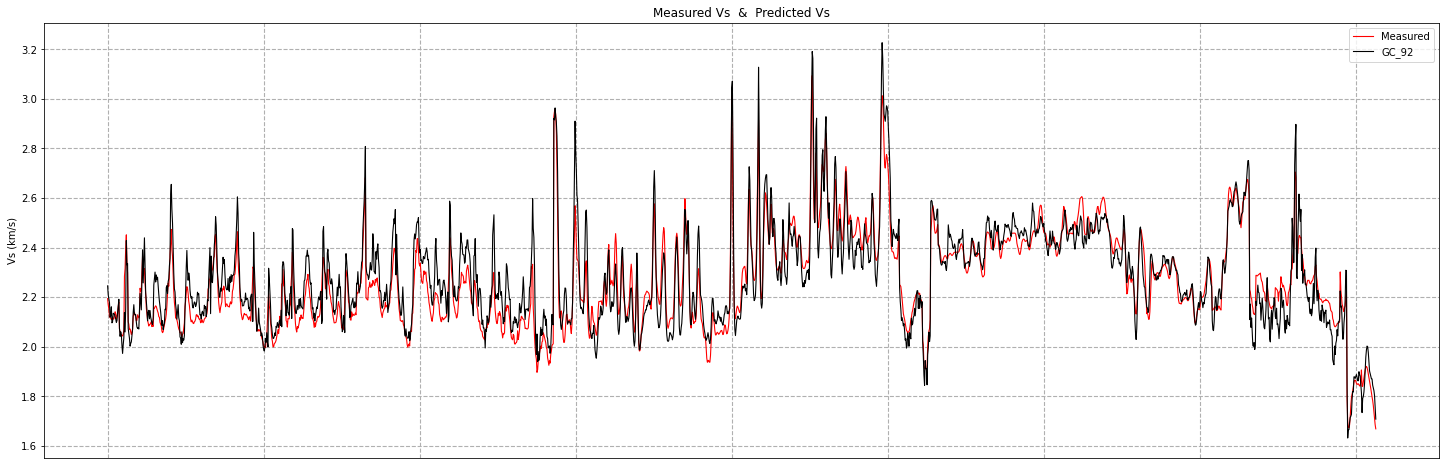

In [11]:
plt.figure(figsize=(25,8))
plt.title("Measured Vs  &  Predicted Vs")
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.ylabel("Vs (km/s)")
plt.plot(data.Vs, c='r', lw=1.1, label="Measured")
plt.plot(predicted_Vs, c='black', lw=1.1, label="GC_92")
plt.grid(lw=1.1, ls='dashed')
plt.legend()
plt.show()

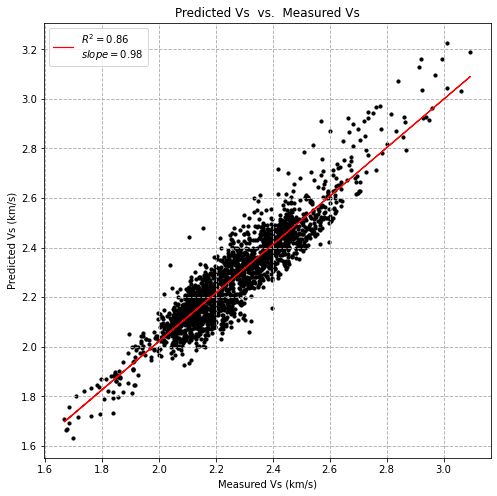

In [31]:
from scipy import stats
m, b, r = stats.linregress(data.Vs, predicted_Vs)[:3]
plt.figure(figsize=(8,8))
plt.title("Predicted Vs  vs.  Measured Vs")
plt.xlabel("Measured Vs (km/s)")
plt.ylabel("Predicted Vs (km/s)")
plt.scatter(data.Vs, predicted_Vs, c='black', s=10)
plt.plot(data.Vs, m*data.Vs + b, c='red', lw=1.2, label=f'$R^2 = {r**2:.2f}$\n$slope = {m:.2f}$')
plt.grid(ls='--', lw=0.9)
plt.legend()
plt.show()